Last time it was found that this formula gave the correct values for energy that agreed with the energy eigenvalues from solving the Schroedinger equation numerically:
$$
E[\rho] = T[\rho] + \int V_{ext}(x) \rho dx
$$

where $T[\rho]$ is the Von Weizsacher functional given by:
$$
T[\rho] = \int \frac{\mid \nabla \rho(x) \mid^2}{8\rho(x)} dx
$$

The functional derivative of the Von Weizsacher functional takes the form:
$$
\frac{\partial T_W[\rho]}{\partial \rho (r)} = -\frac{1}{4}\frac{\nabla^2 \rho}{\rho} + \frac{1}{8} \frac{\nabla \rho \cdot \nabla \rho}{\rho^2}
$$

When inputting the ground-state density or any of the excited state densities, it was found that 
$$
\frac{\partial T_W[\rho]}{\partial \rho} + V_{ext}(x) = \alpha[\rho]= c
$$
where c is a constant, which turned out to be equal to the energy eigenvalue for that density. This means that the total energy functional has stationary points at each of the excited states, not only at the ground-state.

This means that each $\rho$ inputted into $\alpha[\rho]$ that causes $\alpha[\rho]$ to go to a constant value for all x should be one of the states, and the constant value should be the energy for that state.

For an initial guess density $\rho$, $\alpha[\rho]$ will have a value at each point on the grid, meaning it can be represented as an N-dimensional vector were each component is it's value on the Nth point on the grid:
$$
\alpha[\rho] = \begin{pmatrix} \alpha_1 \\ \alpha_2 \\ \vdots \\ \alpha_n \end{pmatrix} \;
$$

$\alpha[\rho]$ should point in the direction of a stationary point (?????) from the initial guess density. However, because we require that $\int \rho(x)dx = N$, (where N is the number of electrons), $\alpha[\rho]$ must be projected onto a constraining hyperplane. The projected vector will point the original guess density towards a better estimate for the solution:
$$
\rho_{new} = \rho_{old} + \Delta \rho
$$

This process is repeated for $\rho_{new}$ until $\alpha[\rho]$ is constant for all values of x.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps, quadrature

In [6]:
def finite_difference_4th_order(arr, x):
    """Compute the first derivative using a 4th-order central finite difference method.""" 
    dx = np.diff(x)[0] # Assuming uniform grid spacing
    n = len(arr) 
    der = np.zeros(n) # 4th order central finite difference for interior points 
    for i in range(2, n-2):
         der[i] = (arr[i-2] - 8 * arr[i-1] + 8 * arr[i+1] - arr[i+2]) / (12 * dx) 
         
    # Lower-order scheme for the boundaries
    der[0] = (arr[1] - arr[0]) / dx # Forward difference
    der[1] = (arr[2] - arr[0]) / (2 * dx) 
    der[-1] = (arr[-1] - arr[-2]) / dx # Backward difference 
    der[-2] = (arr[-1] - arr[-3]) / (2 * dx)
    return der 


def booles(f, x):
    """Integrate using Boole's Rule (5th order accuracy)."""
    if len(x) < 5 or len(f) < 5:
        raise ValueError("Boole's rule requires at least 5 points")
    
    n = len(x)
    integral = 0.0
    for i in range(0, n-4, 4):
        h = x[i+1] - x[i]  # Step size (assume uniform spacing)
        integral += (2 * h / 45) * (7 * f[i] + 32 * f[i+1] + 12 * f[i+2] + 32 * f[i+3] + 7 * f[i+4])
    
    return integral


In [7]:
def project_onto_hyperplane(v, n):
    # Ensure n is normalized (has unit length)
    n = n / np.linalg.norm(n)
    
    # Compute the projection of v onto n
    projection_onto_normal = np.dot(v, n) * n
    
    # Subtract the projection from v to get the projection onto the hyperplane
    projection_onto_hyperplane = v - projection_onto_normal
    
    return projection_onto_hyperplane

In [30]:
def gaussian(x,a,o,p):
    f = a*(np.exp(-((x-p)**2)/(2*(o**2))))
    return f

# Parameters of Gaussian
A = 100  # Amplitude (change sign for attractive/replusive potential)
well_size = 1
b = well_size/2   # x position
O = 0.06   # Standard deviation

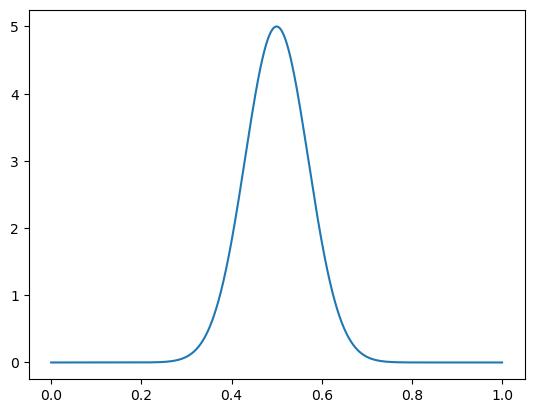

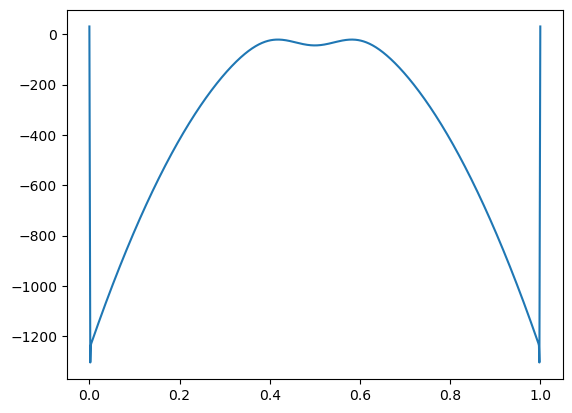

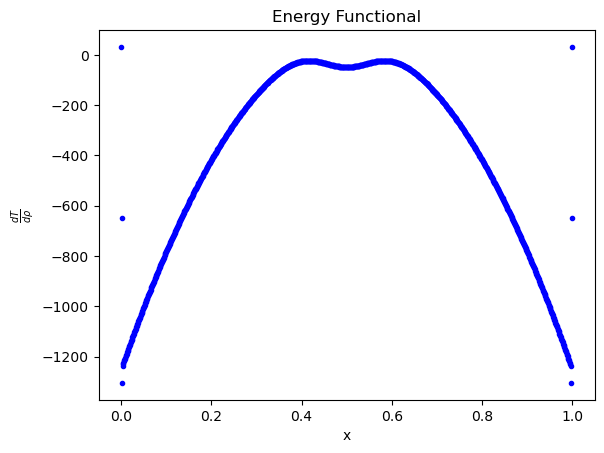

In [40]:
s = 1000
x = np.linspace(0, 1, s-1)

# Defining the potential we're trying to solve for
potential = gaussian(x,-A,O,b)

# An initial guess for the density 
density_guess = gaussian(x,5,0.07,b)
plt.plot(x,density_guess)
plt.show()

# Now comparing the numerical result with the formula for the functional derivative of the von weizsacher functional from Parr and Yang
first_derivative = finite_difference_4th_order(density_guess, x)
second_derivative = finite_difference_4th_order(first_derivative, x)

von_weiz_derivative = -(1/4)*(second_derivative/density_guess) + (1/8)*( ((first_derivative)*(first_derivative))/(density_guess**2) )
alpha = von_weiz_derivative + potential

# Stuff about projecting hyperplanes blah
alpha_proj = alpha

density_new = density_guess + alpha_proj

plt.plot(x,density_new)
plt.show()

plt.plot(x, alpha, 'b.')
plt.title("Energy Functional")
plt.xlabel('x')
plt.ylabel(r'$\frac{dT}{d \rho}$')
#plt.ylim(-100,100)
plt.show()